In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

In [2]:
df = pd.read_excel("usefile.xlsx")

In [3]:
df

Gender Index   Age  Hypertension  Heart Disease  Martial Status  \
0                 0   3.0             0              0               0   
1                 0  58.0             1              0               1   
2                 1   8.0             0              0               0   
3                 1  70.0             0              0               1   
4                 1  47.0             0              0               1   
...             ...   ...           ...            ...             ...   
43395             1  10.0             0              0               0   
43396             1  56.0             0              0               1   
43397             1  82.0             1              0               1   
43398             0  40.0             0              0               1   
43399             1  82.0             0              0               1   

       Work Type Index  Residence Type  Average Glucose Level   BMI  \
0                    0               0                  95.12  18.0   
1                    2               1                  87.96  39.2   
2                    2               1                 110.89  17.6   
3                    2               0                  69.04  35.9   
4                    2               1                 210.95  50.1   
...                ...             ...                    ...   ...   
43395                0               1                  58.64  20.4   
43396                4               1                 213.61  55.4   
43397                2               1                  91.94  28.9   
43398                2               1                  99.16  33.2   
43399                2               1                  79.48  20.6   

       Smoking Status Index  Stroke  
0                         0       0  
1                         0       0  
2                         0       0  
3                         1       0  
4                         0       0  
...                     ...     ...  
43395                     0       0  
43396                     1       0  
43397                     1       0  
43398                     0       0  
43399                     0       0  

[43400 rows x 11 columns]

<AxesSubplot:>

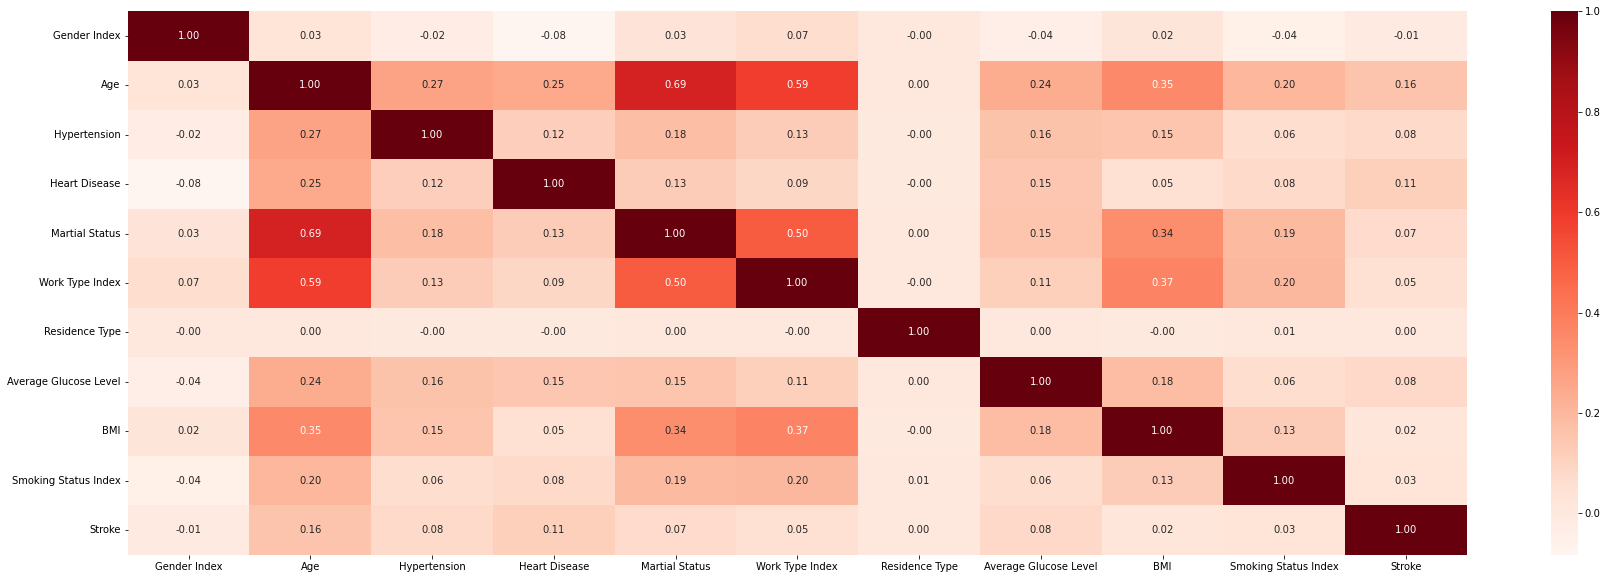

In [4]:
plt.rcParams['figure.figsize'] = (30,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Reds')

In [5]:
X = df.drop('Stroke',axis=1)
y = df['Stroke']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [7]:
X_train.shape

(34720, 10)

In [8]:
X_test.shape

(8680, 10)

# Feature Scaling

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing ANN

In [10]:
ann = tf.keras.models.Sequential()

# Creating Hidden Layers 

In [11]:
#first layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [12]:
#second layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

# Creating Output Layer

In [13]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Compiling ANN 

In [14]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN

In [39]:
history = ann.fit(X_train,y_train,batch_size=32,epochs = 20)

Epoch 1/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9813
Epoch 2/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9813
Epoch 3/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9813
Epoch 4/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9813
Epoch 5/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0176 - accuracy: 0.9813
Epoch 6/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9813
Epoch 7/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9813
Epoch 8/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9813
Epoch 9/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9813
Epoch 10/20
1085/1085 [==============================] - 2s 2ms/step - loss: 0.017

In [16]:
y_pred = ann.predict(X_test)

272/272 [==============================] - 0s 1ms/step


In [17]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [18]:
ann.compile(loss='MSE', optimizer='adam',metrics = ["accuracy"])

In [19]:
y_pred1 = ann.predict(X_test)

272/272 [==============================] - 0s 1ms/step


In [20]:
cvscores= []
scores = ann.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 98.47%
98.47% (+/- 0.00%)


In [21]:
ann.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x000002CD2AA9F940>>

In [22]:
cm = confusion_matrix(y_test,y_pred)

In [23]:
cm

array([[8547,    0],
       [ 133,    0]], dtype=int64)

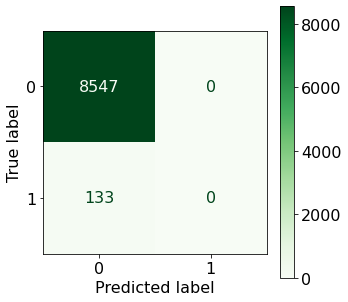

In [45]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')

In [25]:
#Mean Abs Error
print(f"Mean Abs Error = {mean_absolute_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Mean Sq Error = {mean_squared_error(y_test,y_pred)}")
#Mean Sq Error
print(f"Root Mean Sq Error = {np.sqrt(mean_squared_error(y_test,y_pred))}")

Mean Abs Error = 0.01532258064516129
Mean Sq Error = 0.01532258064516129
Root Mean Sq Error = 0.1237844119635477


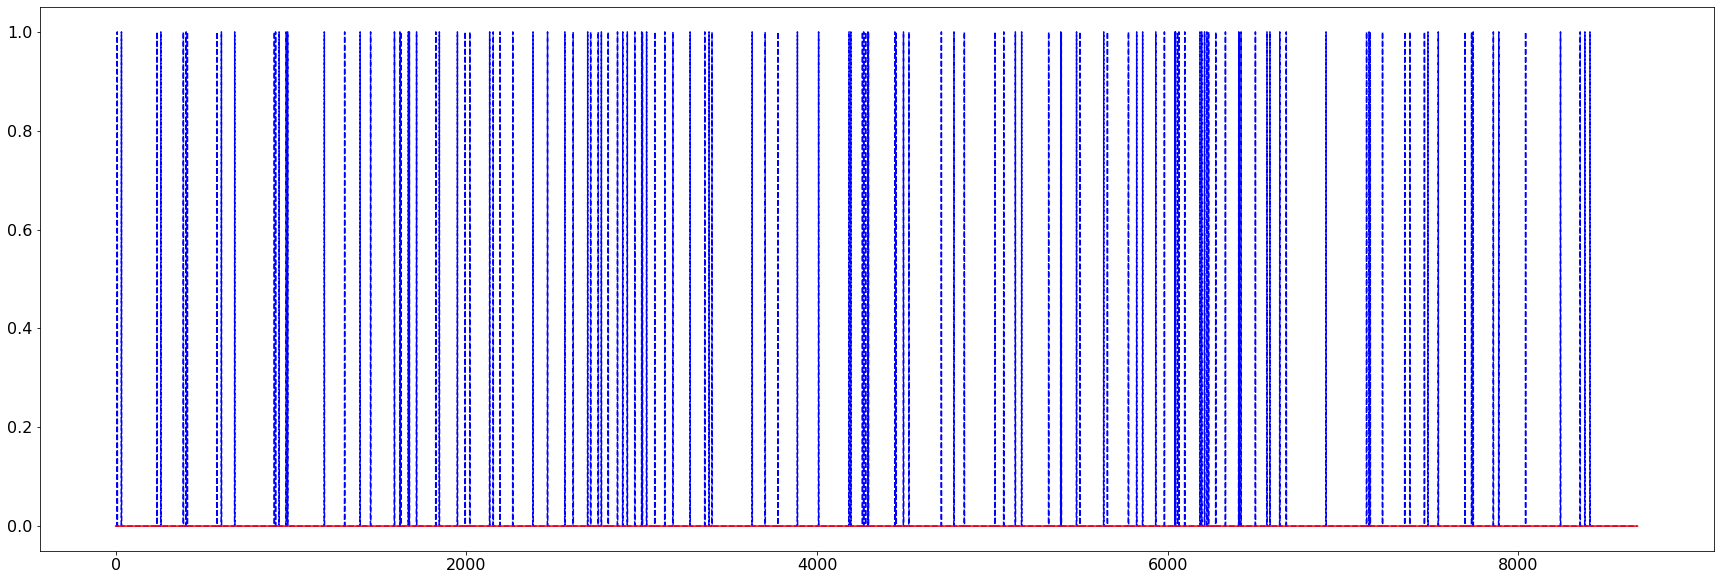

In [26]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'blue', linestyle = '--')
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

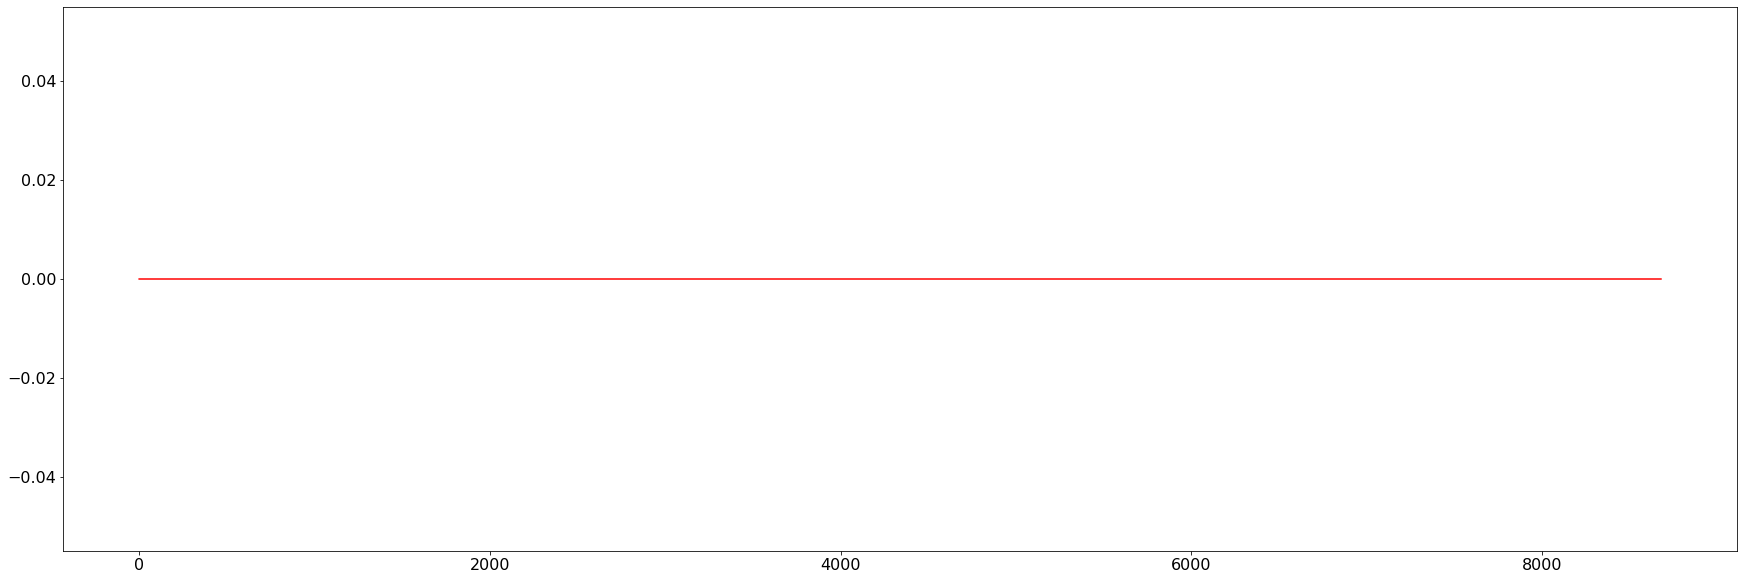

In [27]:
plt.rcParams['figure.figsize'] = (30,10)
x_ax = range(len(X_test))
plt.plot(x_ax, y_pred, label = 'Predicted', color = 'red', linestyle = '-')

In [28]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [29]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [30]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test)

In [44]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.088872
0:	learn: 0.1350609	test: 0.1224475	best: 0.1224475 (0)	total: 8.35ms	remaining: 8.34s
1:	learn: 0.1346205	test: 0.1220938	best: 0.1220938 (1)	total: 15.4ms	remaining: 7.67s
2:	learn: 0.1342366	test: 0.1218010	best: 0.1218010 (2)	total: 23.5ms	remaining: 7.8s
3:	learn: 0.1338874	test: 0.1215516	best: 0.1215516 (3)	total: 30.6ms	remaining: 7.62s
4:	learn: 0.1336533	test: 0.1213962	best: 0.1213962 (4)	total: 38.1ms	remaining: 7.58s
5:	learn: 0.1334202	test: 0.1212588	best: 0.1212588 (5)	total: 44.7ms	remaining: 7.4s
6:	learn: 0.1332093	test: 0.1211336	best: 0.1211336 (6)	total: 51.4ms	remaining: 7.29s
7:	learn: 0.1330172	test: 0.1210220	best: 0.1210220 (7)	total: 57.9ms	remaining: 7.18s
8:	learn: 0.1328690	test: 0.1209287	best: 0.1209287 (8)	total: 64.9ms	remaining: 7.14s
9:	learn: 0.1327216	test: 0.1208335	best: 0.1208335 (9)	total: 71.5ms	remaining: 7.08s
10:	learn: 0.1325830	test: 0.1207840	best: 0.1207840 (10)	total: 77.8ms	remaining: 7s
11:	learn: 0.132

103:	learn: 0.1280369	test: 0.1207527	best: 0.1203220 (30)	total: 721ms	remaining: 6.21s
104:	learn: 0.1280192	test: 0.1207624	best: 0.1203220 (30)	total: 727ms	remaining: 6.2s
105:	learn: 0.1279647	test: 0.1207750	best: 0.1203220 (30)	total: 737ms	remaining: 6.22s
106:	learn: 0.1279414	test: 0.1207716	best: 0.1203220 (30)	total: 746ms	remaining: 6.22s
107:	learn: 0.1279144	test: 0.1207746	best: 0.1203220 (30)	total: 755ms	remaining: 6.24s
108:	learn: 0.1278640	test: 0.1207575	best: 0.1203220 (30)	total: 764ms	remaining: 6.25s
109:	learn: 0.1278492	test: 0.1207611	best: 0.1203220 (30)	total: 772ms	remaining: 6.24s
110:	learn: 0.1278223	test: 0.1207648	best: 0.1203220 (30)	total: 779ms	remaining: 6.24s
111:	learn: 0.1277741	test: 0.1207535	best: 0.1203220 (30)	total: 786ms	remaining: 6.23s
112:	learn: 0.1277300	test: 0.1207523	best: 0.1203220 (30)	total: 792ms	remaining: 6.22s
113:	learn: 0.1276928	test: 0.1207761	best: 0.1203220 (30)	total: 799ms	remaining: 6.21s
114:	learn: 0.1276729	

200:	learn: 0.1245726	test: 0.1212984	best: 0.1203220 (30)	total: 1.44s	remaining: 5.71s
201:	learn: 0.1245515	test: 0.1212925	best: 0.1203220 (30)	total: 1.45s	remaining: 5.71s
202:	learn: 0.1245367	test: 0.1212937	best: 0.1203220 (30)	total: 1.45s	remaining: 5.7s
203:	learn: 0.1245209	test: 0.1212958	best: 0.1203220 (30)	total: 1.46s	remaining: 5.7s
204:	learn: 0.1245036	test: 0.1213002	best: 0.1203220 (30)	total: 1.47s	remaining: 5.69s
205:	learn: 0.1244850	test: 0.1213134	best: 0.1203220 (30)	total: 1.47s	remaining: 5.68s
206:	learn: 0.1244403	test: 0.1213235	best: 0.1203220 (30)	total: 1.48s	remaining: 5.68s
207:	learn: 0.1244138	test: 0.1213315	best: 0.1203220 (30)	total: 1.49s	remaining: 5.67s
208:	learn: 0.1243638	test: 0.1213428	best: 0.1203220 (30)	total: 1.5s	remaining: 5.66s
209:	learn: 0.1243359	test: 0.1213543	best: 0.1203220 (30)	total: 1.5s	remaining: 5.66s
210:	learn: 0.1243017	test: 0.1213722	best: 0.1203220 (30)	total: 1.51s	remaining: 5.65s
211:	learn: 0.1242748	tes

299:	learn: 0.1220719	test: 0.1217990	best: 0.1203220 (30)	total: 2.15s	remaining: 5.02s
300:	learn: 0.1220597	test: 0.1217992	best: 0.1203220 (30)	total: 2.16s	remaining: 5.01s
301:	learn: 0.1220272	test: 0.1218116	best: 0.1203220 (30)	total: 2.17s	remaining: 5.01s
302:	learn: 0.1219901	test: 0.1218026	best: 0.1203220 (30)	total: 2.17s	remaining: 5s
303:	learn: 0.1219707	test: 0.1218010	best: 0.1203220 (30)	total: 2.18s	remaining: 4.99s
304:	learn: 0.1219422	test: 0.1218025	best: 0.1203220 (30)	total: 2.19s	remaining: 4.99s
305:	learn: 0.1219275	test: 0.1218098	best: 0.1203220 (30)	total: 2.19s	remaining: 4.98s
306:	learn: 0.1219040	test: 0.1218185	best: 0.1203220 (30)	total: 2.2s	remaining: 4.97s
307:	learn: 0.1218801	test: 0.1218158	best: 0.1203220 (30)	total: 2.21s	remaining: 4.96s
308:	learn: 0.1218491	test: 0.1218209	best: 0.1203220 (30)	total: 2.21s	remaining: 4.95s
309:	learn: 0.1218201	test: 0.1218267	best: 0.1203220 (30)	total: 2.22s	remaining: 4.95s
310:	learn: 0.1218105	tes

401:	learn: 0.1196012	test: 0.1224799	best: 0.1203220 (30)	total: 2.87s	remaining: 4.27s
402:	learn: 0.1195798	test: 0.1224782	best: 0.1203220 (30)	total: 2.88s	remaining: 4.26s
403:	learn: 0.1195624	test: 0.1224824	best: 0.1203220 (30)	total: 2.9s	remaining: 4.28s
404:	learn: 0.1195382	test: 0.1224958	best: 0.1203220 (30)	total: 2.91s	remaining: 4.28s
405:	learn: 0.1195100	test: 0.1225013	best: 0.1203220 (30)	total: 2.92s	remaining: 4.27s
406:	learn: 0.1194812	test: 0.1225300	best: 0.1203220 (30)	total: 2.93s	remaining: 4.26s
407:	learn: 0.1194398	test: 0.1225465	best: 0.1203220 (30)	total: 2.93s	remaining: 4.26s
408:	learn: 0.1194224	test: 0.1225566	best: 0.1203220 (30)	total: 2.94s	remaining: 4.25s
409:	learn: 0.1194006	test: 0.1225627	best: 0.1203220 (30)	total: 2.95s	remaining: 4.24s
410:	learn: 0.1193859	test: 0.1225646	best: 0.1203220 (30)	total: 2.96s	remaining: 4.24s
411:	learn: 0.1193732	test: 0.1225653	best: 0.1203220 (30)	total: 2.96s	remaining: 4.23s
412:	learn: 0.1193540	

497:	learn: 0.1175769	test: 0.1228232	best: 0.1203220 (30)	total: 3.58s	remaining: 3.61s
498:	learn: 0.1175461	test: 0.1228393	best: 0.1203220 (30)	total: 3.59s	remaining: 3.6s
499:	learn: 0.1175301	test: 0.1228364	best: 0.1203220 (30)	total: 3.6s	remaining: 3.6s
500:	learn: 0.1175175	test: 0.1228385	best: 0.1203220 (30)	total: 3.6s	remaining: 3.59s
501:	learn: 0.1174875	test: 0.1228372	best: 0.1203220 (30)	total: 3.61s	remaining: 3.58s
502:	learn: 0.1174632	test: 0.1228266	best: 0.1203220 (30)	total: 3.62s	remaining: 3.58s
503:	learn: 0.1174372	test: 0.1228545	best: 0.1203220 (30)	total: 3.63s	remaining: 3.57s
504:	learn: 0.1174213	test: 0.1228557	best: 0.1203220 (30)	total: 3.63s	remaining: 3.56s
505:	learn: 0.1174112	test: 0.1228633	best: 0.1203220 (30)	total: 3.64s	remaining: 3.56s
506:	learn: 0.1173814	test: 0.1228639	best: 0.1203220 (30)	total: 3.65s	remaining: 3.55s
507:	learn: 0.1173549	test: 0.1228803	best: 0.1203220 (30)	total: 3.66s	remaining: 3.54s
508:	learn: 0.1173307	tes

595:	learn: 0.1157085	test: 0.1233686	best: 0.1203220 (30)	total: 4.3s	remaining: 2.92s
596:	learn: 0.1156968	test: 0.1233754	best: 0.1203220 (30)	total: 4.31s	remaining: 2.91s
597:	learn: 0.1156696	test: 0.1233781	best: 0.1203220 (30)	total: 4.32s	remaining: 2.9s
598:	learn: 0.1156493	test: 0.1233718	best: 0.1203220 (30)	total: 4.32s	remaining: 2.89s
599:	learn: 0.1156226	test: 0.1233824	best: 0.1203220 (30)	total: 4.33s	remaining: 2.89s
600:	learn: 0.1155882	test: 0.1233919	best: 0.1203220 (30)	total: 4.34s	remaining: 2.88s
601:	learn: 0.1155728	test: 0.1233935	best: 0.1203220 (30)	total: 4.34s	remaining: 2.87s
602:	learn: 0.1155525	test: 0.1234053	best: 0.1203220 (30)	total: 4.35s	remaining: 2.87s
603:	learn: 0.1155254	test: 0.1233846	best: 0.1203220 (30)	total: 4.36s	remaining: 2.86s
604:	learn: 0.1155072	test: 0.1233967	best: 0.1203220 (30)	total: 4.37s	remaining: 2.85s
605:	learn: 0.1154744	test: 0.1234154	best: 0.1203220 (30)	total: 4.37s	remaining: 2.84s
606:	learn: 0.1154587	t

696:	learn: 0.1138085	test: 0.1238385	best: 0.1203220 (30)	total: 5.03s	remaining: 2.19s
697:	learn: 0.1137997	test: 0.1238383	best: 0.1203220 (30)	total: 5.04s	remaining: 2.18s
698:	learn: 0.1137971	test: 0.1238388	best: 0.1203220 (30)	total: 5.04s	remaining: 2.17s
699:	learn: 0.1137704	test: 0.1238281	best: 0.1203220 (30)	total: 5.05s	remaining: 2.16s
700:	learn: 0.1137555	test: 0.1238323	best: 0.1203220 (30)	total: 5.06s	remaining: 2.16s
701:	learn: 0.1137341	test: 0.1238398	best: 0.1203220 (30)	total: 5.06s	remaining: 2.15s
702:	learn: 0.1137164	test: 0.1238471	best: 0.1203220 (30)	total: 5.07s	remaining: 2.14s
703:	learn: 0.1136877	test: 0.1238587	best: 0.1203220 (30)	total: 5.08s	remaining: 2.13s
704:	learn: 0.1136644	test: 0.1238758	best: 0.1203220 (30)	total: 5.08s	remaining: 2.13s
705:	learn: 0.1136531	test: 0.1238796	best: 0.1203220 (30)	total: 5.09s	remaining: 2.12s
706:	learn: 0.1136296	test: 0.1238915	best: 0.1203220 (30)	total: 5.1s	remaining: 2.11s
707:	learn: 0.1136061	

791:	learn: 0.1123198	test: 0.1243667	best: 0.1203220 (30)	total: 5.74s	remaining: 1.51s
792:	learn: 0.1123011	test: 0.1243661	best: 0.1203220 (30)	total: 5.74s	remaining: 1.5s
793:	learn: 0.1122729	test: 0.1243756	best: 0.1203220 (30)	total: 5.75s	remaining: 1.49s
794:	learn: 0.1122573	test: 0.1243766	best: 0.1203220 (30)	total: 5.76s	remaining: 1.49s
795:	learn: 0.1122428	test: 0.1243851	best: 0.1203220 (30)	total: 5.77s	remaining: 1.48s
796:	learn: 0.1122383	test: 0.1243858	best: 0.1203220 (30)	total: 5.78s	remaining: 1.47s
797:	learn: 0.1122329	test: 0.1243898	best: 0.1203220 (30)	total: 5.79s	remaining: 1.46s
798:	learn: 0.1122125	test: 0.1243973	best: 0.1203220 (30)	total: 5.79s	remaining: 1.46s
799:	learn: 0.1121850	test: 0.1243943	best: 0.1203220 (30)	total: 5.8s	remaining: 1.45s
800:	learn: 0.1121660	test: 0.1244037	best: 0.1203220 (30)	total: 5.81s	remaining: 1.44s
801:	learn: 0.1121528	test: 0.1244019	best: 0.1203220 (30)	total: 5.82s	remaining: 1.44s
802:	learn: 0.1121343	t

884:	learn: 0.1107814	test: 0.1248187	best: 0.1203220 (30)	total: 6.47s	remaining: 840ms
885:	learn: 0.1107652	test: 0.1248278	best: 0.1203220 (30)	total: 6.47s	remaining: 833ms
886:	learn: 0.1107299	test: 0.1247935	best: 0.1203220 (30)	total: 6.48s	remaining: 826ms
887:	learn: 0.1107183	test: 0.1247933	best: 0.1203220 (30)	total: 6.49s	remaining: 819ms
888:	learn: 0.1106968	test: 0.1248066	best: 0.1203220 (30)	total: 6.5s	remaining: 811ms
889:	learn: 0.1106806	test: 0.1247944	best: 0.1203220 (30)	total: 6.5s	remaining: 804ms
890:	learn: 0.1106748	test: 0.1247960	best: 0.1203220 (30)	total: 6.51s	remaining: 797ms
891:	learn: 0.1106496	test: 0.1248069	best: 0.1203220 (30)	total: 6.52s	remaining: 789ms
892:	learn: 0.1106322	test: 0.1248232	best: 0.1203220 (30)	total: 6.53s	remaining: 782ms
893:	learn: 0.1106309	test: 0.1248231	best: 0.1203220 (30)	total: 6.53s	remaining: 775ms
894:	learn: 0.1106082	test: 0.1248240	best: 0.1203220 (30)	total: 6.54s	remaining: 767ms
895:	learn: 0.1106015	t


bestTest = 0.1203219612
bestIteration = 30

Shrink model to first 31 iterations.


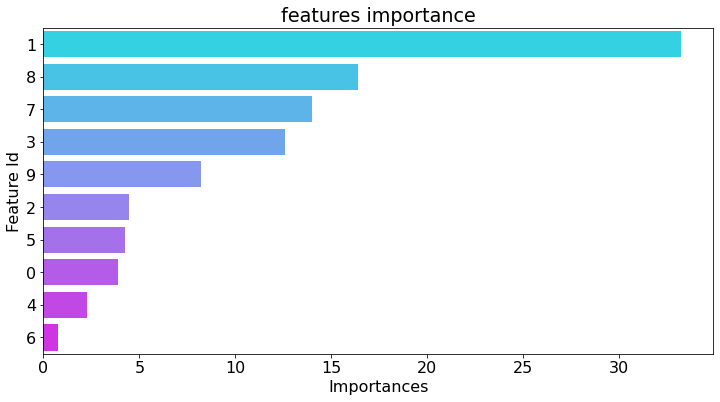

In [48]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [33]:
scores = ann.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 98.47%
98.47% (+/- 0.00%)


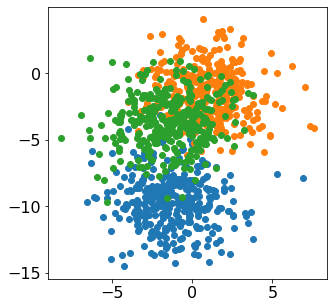

In [47]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

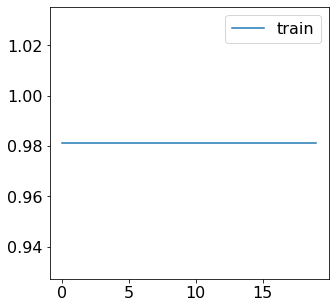

In [46]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()